In [2]:
from pathlib import Path
import json
import numpy as np
import torch
from matplotlib import pyplot as plt
import seaborn as sns


sns.set_theme('paper')
sns.set_style("white")

SMALL_SIZE = 12 #8
MEDIUM_SIZE = 16 #10
BIGGER_SIZE = 18 #12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=2)  # fontsize of the figure title



log_dir = Path('../log')
exp_dirs = ['sn32_snfix', 'sn32_norm_est001']
names = ['SNGAN', r'Ours, $\alpha=0.01$']

specs = dict()
for exp, name in zip(exp_dirs, names):
    spec_file = Path(log_dir, exp, 'sv_d', 'spec100000.pt')
    spec = torch.load(spec_file, map_location='cpu')
    specs[name] = spec

In [3]:
layer_names = list(specs[names[0]].keys())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


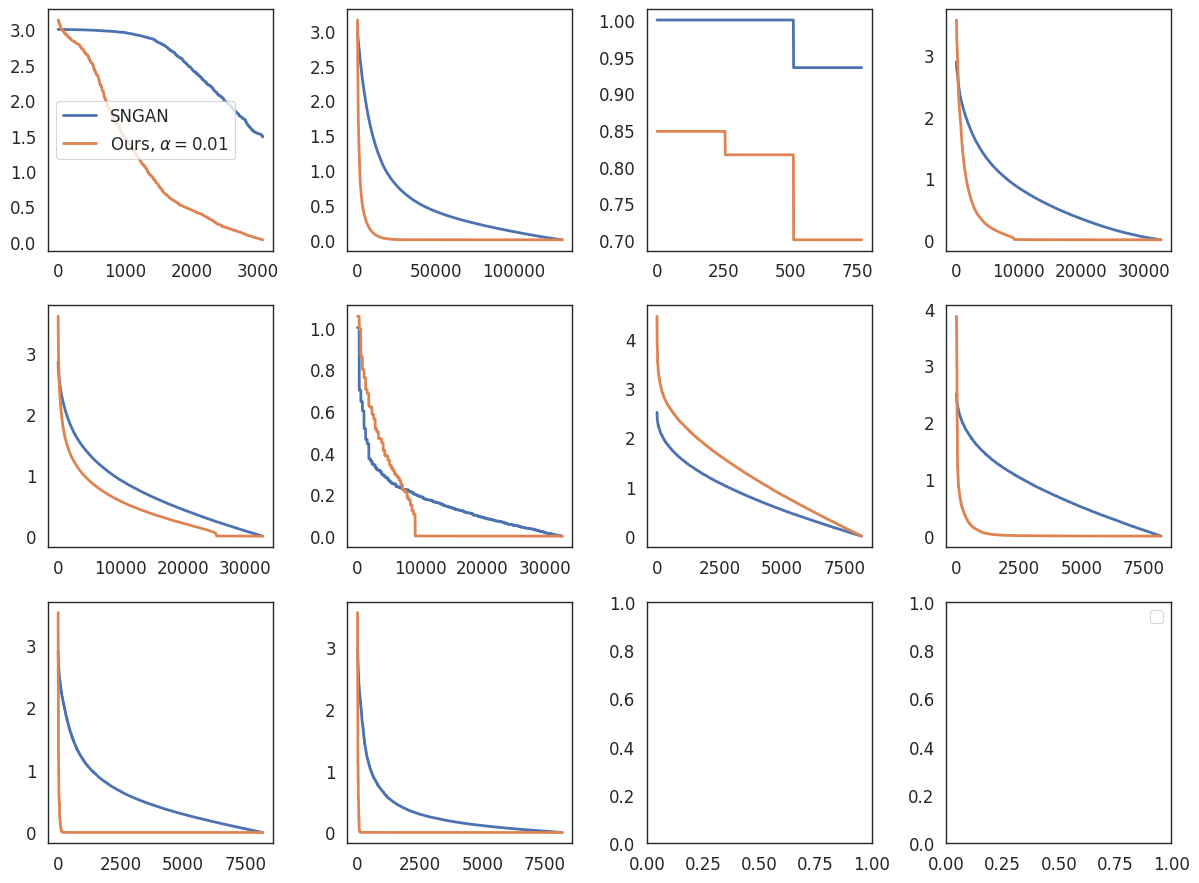

In [6]:
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(12, 9))
for idx, ax in enumerate(axs.flatten()):
    if idx < len(layer_names): # and idx != 2:
        for name in names:
            ax.plot(specs[name][layer_names[idx]], label=name)
            #print((specs[name][layer_names[idx]] ** 2).sum())
axs.flatten()[0].legend()
plt.tight_layout()
plt.legend()
plt.show()

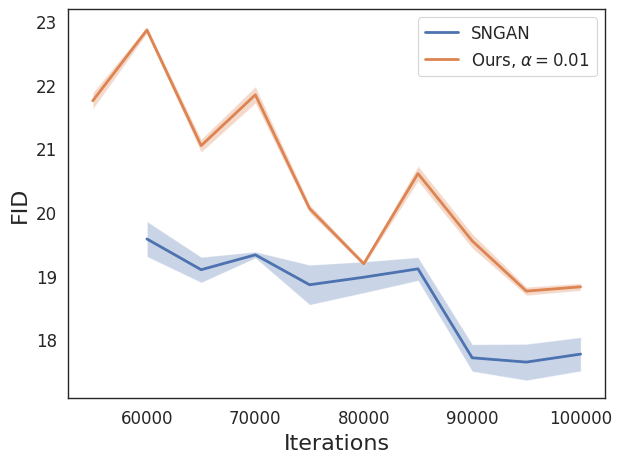

In [5]:
# specs = dict()
for exp, name in zip(exp_dirs, names):
    fids = json.load(Path(log_dir, exp, 'fid_50k_50k.json').open('r'))
    steps = list(map(int, list(fids.keys())))
    fids_mean = np.array([np.mean(val) for val in fids.values()])
    fids_std = np.array([np.std(val) for val in fids.values()])
    
    plt.plot(steps, fids_mean, label=name)
    plt.fill_between(steps, fids_mean - 1.96 * fids_std, fids_mean + 1.96 * fids_std, alpha=0.3)
plt.ylabel('FID')
plt.xlabel('Iterations')
plt.tight_layout()
plt.legend()
plt.show()